# Get current stock price data

In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [2]:
msft = yf.Ticker("MSFT")

In [3]:
#msft.history(period='6mo')

In [4]:
dataset_train = yf.download("MSFT", start="2022-01-27", end="2022-12-27") # poner un dia mas del actual

[*********************100%***********************]  1 of 1 completed


In [5]:
dataset_train.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-27 00:00:00-05:00,302.660004,307.299988,297.929993,299.839996,297.056549,53481300
2022-01-28 00:00:00-05:00,300.230011,308.480011,294.450012,308.260010,305.398376,49743700
2022-01-31 00:00:00-05:00,308.950012,312.380005,306.369995,310.980011,308.093109,46444500
2022-02-01 00:00:00-05:00,310.410004,310.630005,305.130005,308.760010,305.893707,40950400
2022-02-02 00:00:00-05:00,309.630005,315.119995,308.880005,313.459991,310.550079,36636000


In [6]:
training_set = dataset_train.iloc[:, 0:1].values
training_set.shape

(230, 1)

In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))

In [8]:
training_set_scaled = sc.fit_transform(training_set)

In [9]:
X_train = []
y_train = []
for i in range(60, 127):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape, y_train.shape)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape, y_train.shape)


(67, 60) (67,)
(67, 60, 1) (67,)


In [10]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

2023-01-27 15:43:18.028755: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-27 15:43:21.346678: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-27 15:43:21.346712: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-27 15:43:29.298295: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directo

In [11]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')

2023-01-27 15:43:33.148919: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-27 15:43:33.156395: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-27 15:43:33.156448: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (codespaces-2686da): /proc/driver/nvidia/version does not exist
2023-01-27 15:43:33.216008: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

# Training

In [24]:
model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
3/3 [==============================] - 0s 80ms/step - loss: 0.0131
Epoch 2/100
3/3 [==============================] - 0s 95ms/step - loss: 0.0096
Epoch 3/100
3/3 [==============================] - 0s 77ms/step - loss: 0.0112
Epoch 4/100
3/3 [==============================] - 0s 78ms/step - loss: 0.0142
Epoch 5/100
3/3 [==============================] - 0s 77ms/step - loss: 0.0108
Epoch 6/100
3/3 [==============================] - 0s 78ms/step - loss: 0.0137
Epoch 7/100
3/3 [==============================] - 0s 83ms/step - loss: 0.0113
Epoch 8/100
3/3 [==============================] - 0s 80ms/step - loss: 0.0093
Epoch 9/100
3/3 [==============================] - 0s 107ms/step - loss: 0.0117
Epoch 10/100
3/3 [==============================] - 0s 82ms/step - loss: 0.0115
Epoch 11/100
3/3 [==============================] - 0s 76ms/step - loss: 0.0089
Epoch 12/100
3/3 [==============================] - 0s 81ms/step - loss: 0.0120
Epoch 13/100
3/3 [==============================

## Predictions on Test set
I take the next month for making predictions

In [25]:
dataset_test = yf.download("MSFT", start="2022-12-28", end="2023-01-27") # poner un dia mas del actual

[*********************100%***********************]  1 of 1 completed


In [26]:
dataset_test.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-28 00:00:00-05:00,236.889999,239.720001,234.169998,234.529999,234.529999,17457100
2022-12-29 00:00:00-05:00,235.649994,241.919998,235.649994,241.009995,241.009995,19770700
2022-12-30 00:00:00-05:00,238.210007,239.960007,236.660004,239.820007,239.820007,21930800
2023-01-03 00:00:00-05:00,243.080002,245.750000,237.399994,239.580002,239.580002,25740000
2023-01-04 00:00:00-05:00,232.279999,232.869995,225.960007,229.100006,229.100006,50623400


In [27]:
real_stock_price = dataset_test.iloc[:, 0:1].values

In [28]:
dataset_test.shape, dataset_train.shape

((20, 6), (230, 6))

In [29]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
dataset_total.shape

(250,)

In [30]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs.shape

(80,)

In [31]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
inputs.shape

(80, 1)

In [32]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(20, 60, 1)

In [33]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 0s 36ms/step


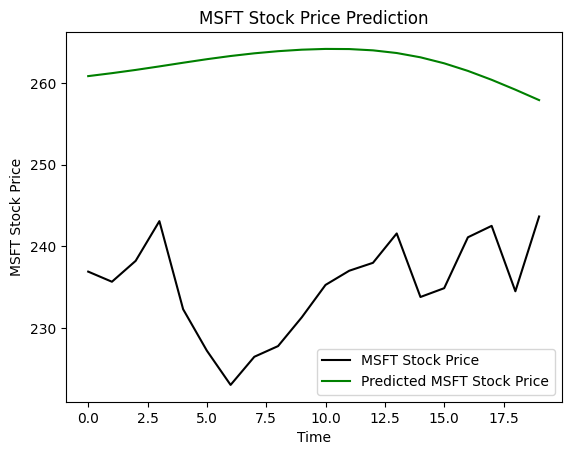

In [34]:
plt.plot(real_stock_price, color = 'black', label = 'MSFT Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted MSFT Stock Price')
plt.title('MSFT Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('MSFT Stock Price')
plt.legend()
plt.show()